<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/Baseball_Runs_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baseball Performance Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import GammaRegressor

## Load Data

In [ ]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 367 (delta 71), reused 15 (delta 15), pack-reused 253 (from 2)
Receiving objects: 100% (367/367), 49.94 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Updating files: 100% (82/82), done.


In [ ]:
dat_mpg = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_III_9_BBallLogs.csv')
dat_mpg.head()

,Year,Month,Day,day_of_week,h_name,h_game_number,h_wins,v_name,v_game_number,v_wins,h_score,v_score
0,2006,4,2,Sun,CHA,1,0,CLE,1,0,10,4
1,2006,4,3,Mon,BAL,1,0,TBA,1,0,9,6
2,2006,4,3,Mon,KCA,1,0,DET,1,0,1,3
3,2006,4,3,Mon,OAK,1,0,NYA,1,0,2,15
4,2006,4,3,Mon,SEA,1,0,ANA,1,0,4,5


In [ ]:
dat_mpg.describe()

,Year,Month,Day,h_game_number,h_wins,v_game_number,v_wins,h_score,v_score
count,26725.000000,26725.000000,26725.000000,26725.000000,26725.000000,26725.000000,26725.000000,26725.000000,26725.000000
mean,2010.999813,6.565613,15.865108,81.486062,40.238092,81.484116,40.255491,4.520786,4.364715
std,3.162106,1.723042,8.865711,46.756760,24.233320,46.757287,24.250419,3.052022,3.129544
min,2006.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2008.000000,5.000000,8.000000,41.000000,20.000000,41.000000,20.000000,2.000000,2.000000
50%,2011.000000,7.000000,16.000000,81.000000,40.000000,82.000000,39.000000,4.000000,4.000000
75%,2014.000000,8.000000,24.000000,122.000000,59.000000,122.000000,60.000000,6.000000,6.000000
max,2016.000000,10.000000,31.000000,163.000000,102.000000,163.000000,102.000000,22.000000,30.000000


In [ ]:
dat_mpg.dtypes

,0
Year,int64
Month,int64
Day,int64
day_of_week,object
h_name,object
h_game_number,int64
h_wins,int64
v_name,object
v_game_number,int64
v_wins,int64


In [ ]:
dat_mpg['h_name'].value_counts()
dat_mpg['v_name'].value_counts()
dat_mpg['day_of_week'].value_counts()

,count
day_of_week,
Sat,4313
Sun,4286
Fri,4226
Wed,4115
Tue,4022
Mon,2906
Thu,2857


## Correlation Analysis

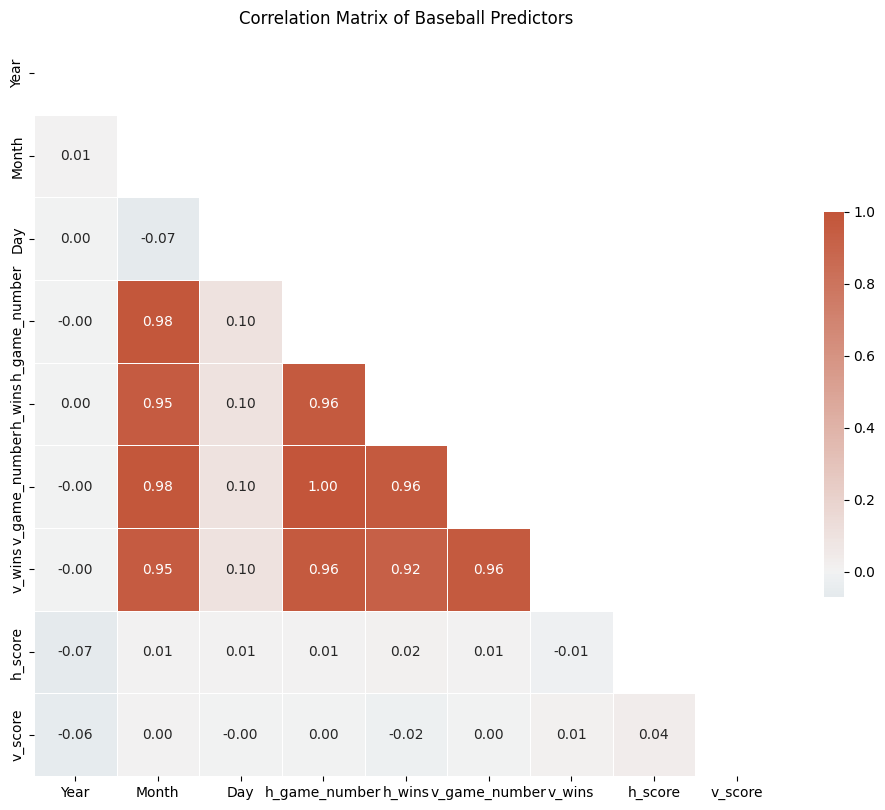

In [ ]:
# 4. Correlation analysis for numeric predictors
numeric_cols = dat_mpg.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

# 5. Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 6. Define diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 7. Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Baseball Predictors")
plt.show()

## Interpretation
All numeric predictors in the baseball dataset show positive correlation with Runs, ranging from 0.0 to 1.0. This indicates that higher values of these features tend to be associated with more runs scored. No negative correlations were observed, suggesting no inverse relationships in the current feature set.


In [ ]:
# Define y and drop target +leakage
y = dat_mpg['h_score']  # Target variable
X = dat_mpg.drop(columns=['h_score', 'v_score'])  # Remove target and post-game info
# One-hot encoded categorical variables
X = pd.concat([X, pd.get_dummies(X[['h_name', 'v_name', 'day_of_week']], drop_first=True)], axis=1)
X = X.drop(columns=['h_name', 'v_name', 'day_of_week'])  # Drop original categorical columns
X = sm.add_constant(X)
# Fit the OLS model
model_ols = sm.OLS(y, X.astype(float)).fit()
# View the summary
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                h_score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     12.47
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          2.85e-138
Time:                        17:03:03   Log-Likelihood:                -67304.
No. Observations:               26725   AIC:                         1.348e+05
Df Residuals:                   26653   BIC:                         1.353e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             141.9400     11.705     12.127      0.000     118.998     164.882
Year               -0.0702      0.006    -12.000      0.000      -0.082      -0.059
Month               0.9119      0.221      4.119      0.000       0.478       1.346
Day                 0.0317      0.007      4.250      0.000       0.017       0.046
h_game_number      -0.0374      0.014     -2.612      0.009      -0.065      -0.009
h_wins              0.0089      0.003      2.856      0.004       0.003       0.015
v_game_number       0.0119      0.014      0.830      0.407      -0.016       0.040
v_wins             -0.0245      0.003     -7.859      0.000      -0.031      -0.018
h_name_ARI          0.1270      0.150      0.845      0.398      -0.168       0.422
h_name_ATL         -0.3379      0.150     -2.253      0.024      -0.632      -0.044
h_name_BAL          0.3084      0.145      2.132      0.033       0.025       0.592
h_name_BOS          0.8971      0.144      6.232      0.000       0.615       1.179
h_name_CHA          0.0524      0.144      0.363      0.717      -0.231       0.335
h_name_CHN         -0.1922      0.150     -1.278      0.201      -0.487       0.103
h_name_CIN         -0.1312      0.150     -0.876      0.381      -0.425       0.162
h_name_CLE          0.1637      0.145      1.131      0.258      -0.120       0.448
h_name_COL          1.1580      0.150      7.697      0.000       0.863       1.453
h_name_DET          0.4138      0.144      2.870      0.004       0.131       0.697
h_name_HOU         -0.3737      0.147     -2.536      0.011      -0.663      -0.085
h_name_KCA         -0.0451      0.145     -0.310      0.757      -0.330       0.240
h_name_LAN         -0.4274      0.150     -2.846      0.004      -0.722      -0.133
h_name_MIA         -0.3921      0.151     -2.603      0.009      -0.687      -0.097
h_name_MIL         -0.0559      0.150     -0.373      0.709      -0.350       0.238
h_name_MIN          0.0882      0.145      0.609      0.543      -0.196       0.372
h_name_NYA          0.6306      0.144      4.364      0.000       0.347       0.914
h_name_NYN         -0.5700      0.150     -3.795      0.000      -0.864      -0.276
h_name_OAK         -0.1519      0.144     -1.057      0.290      -0.434       0.130
h_name_PHI         -0.0582      0.150     -0.388      0.698      -0.352       0.236
h_name_PIT         -0.3957      0.150     -2.633      0.008      -0.690      -0.101
h_name_SDN         -0.8385      0.151     -5.571      0.000      -1.134      -0.544
h_name_SEA         -0.6147      0.144     -4.259      0.000      -0.898      -0.332
h_name_SFN         -0.6117      0.149     -4.092      0.000      -0.905      -0.319
h_name_SLN         -0.2040      0.150     -1.361      0.173      -0.498       0.090
h_name_TBA         -0.1075      0.144     -0.747      0.455

## Residual Diagnostic Plot


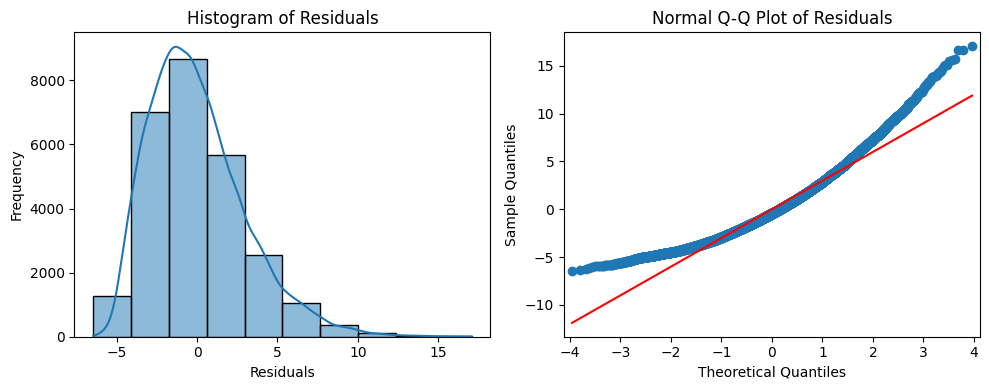

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 📉 Histogram of residuals
sns.histplot(model_ols.resid, bins=10, ax=axes[0], kde=True)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Residuals')

# 📈 Q-Q plot for normality check
sm.qqplot(model_ols.resid, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

## Residual Diagnostics Summary
- R-squared = 0.032 → Model explains only 3.2% of h_score variance. Very weak
- fit.
- Skew = 0.905 → Residuals are right-skewed. Model tends to underpredict high scores.
- Kurtosis = 4.144 → Heavy tails. More extreme errors than expected (outliers).
- Histogram → Not bell-shaped. Confirms skew and outliers.
- Q-Q Plot → Deviations from diagonal line. Residuals not normally distributed.





## Residuals Vs Features Variables

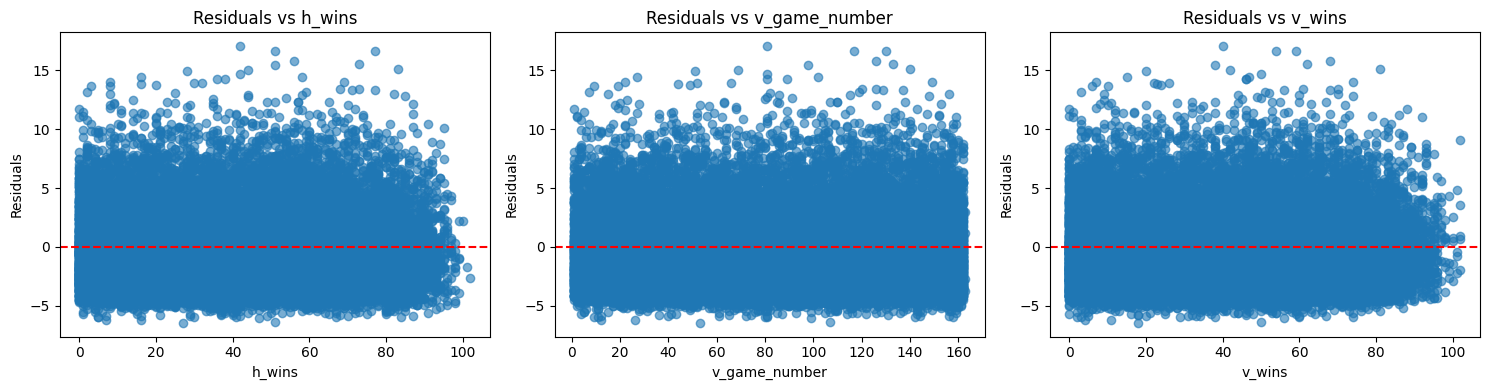

In [ ]:

features_to_plot = ['h_wins', 'v_game_number', 'v_wins']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, feature in enumerate(features_to_plot):
    axes[i].scatter(dat_mpg[feature], model_ols.resid, alpha=0.6)
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residuals vs {feature}')

plt.tight_layout()
plt.show()

When plotting residuals against features like h_wins, v_game_number, or v_wins, we assess whether the variance of errors remains constant across different values. If the residuals form a fan shape or show increasing spread as the feature values rise, this indicates heteroscedasticity — a violation of the OLS assumption


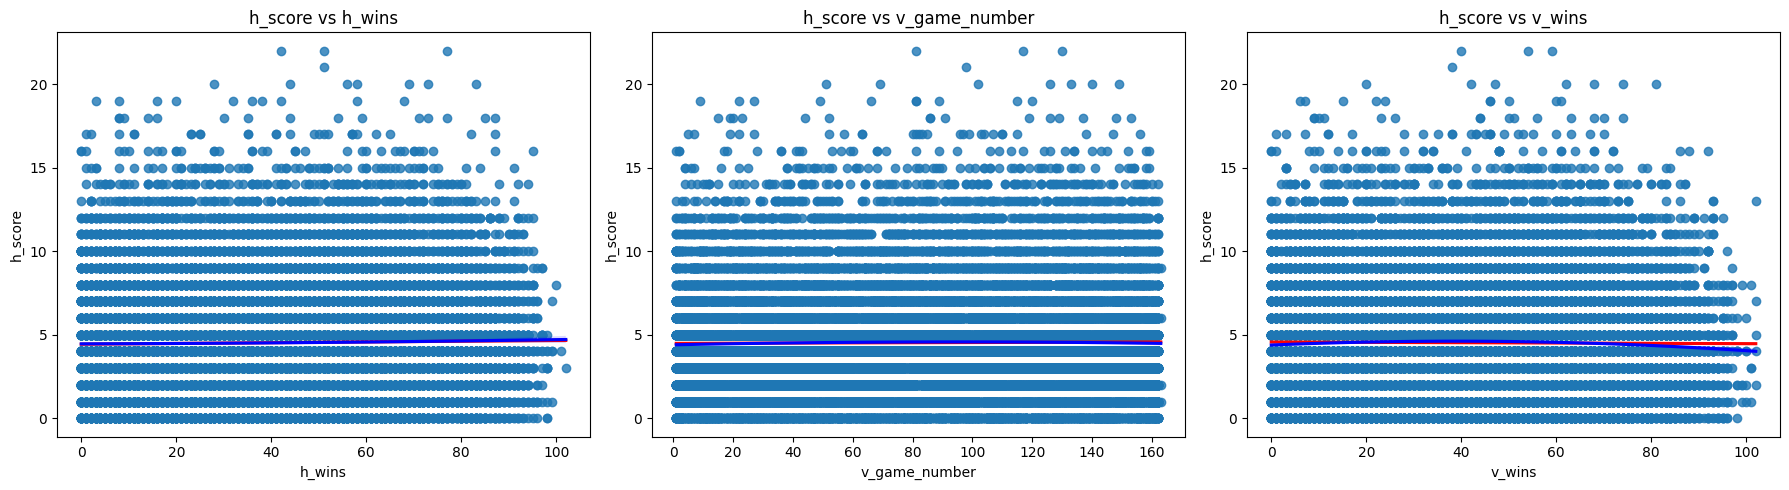

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# h_score vs h_wins
sns.regplot(x=dat_mpg['h_wins'], y=dat_mpg['h_score'], ax=axes[0], line_kws={'color': 'red'})
sns.regplot(x=dat_mpg['h_wins'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[0], line_kws={'color': 'blue'})
axes[0].set_title('h_score vs h_wins')

# h_score vs v_game_number
sns.regplot(x=dat_mpg['v_game_number'], y=dat_mpg['h_score'], ax=axes[1], line_kws={'color': 'red'})
sns.regplot(x=dat_mpg['v_game_number'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[1], line_kws={'color': 'blue'})
axes[1].set_title('h_score vs v_game_number')

# h_score vs v_wins
sns.regplot(x=dat_mpg['v_wins'], y=dat_mpg['h_score'], ax=axes[2], line_kws={'color': 'red'})
sns.regplot(x=dat_mpg['v_wins'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[2], line_kws={'color': 'blue'})
axes[2].set_title('h_score vs v_wins')

plt.tight_layout()
plt.show()

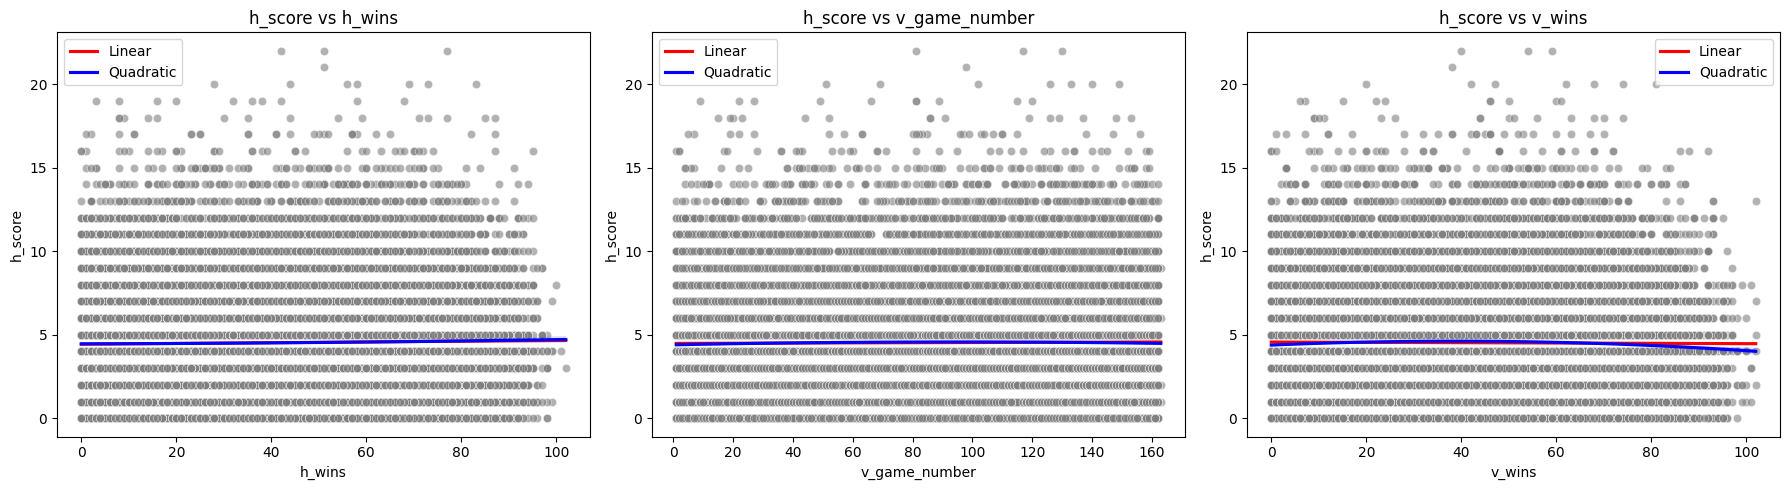

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# h_score vs h_wins
sns.scatterplot(x=dat_mpg['h_wins'], y=dat_mpg['h_score'], ax=axes[0], color='gray', alpha=0.6)
sns.regplot(x=dat_mpg['h_wins'], y=dat_mpg['h_score'], ax=axes[0], scatter=False, line_kws={'color': 'red'}, label='Linear')
sns.regplot(x=dat_mpg['h_wins'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[0], line_kws={'color': 'blue'}, label='Quadratic')
axes[0].set_title('h_score vs h_wins')
axes[0].legend()

# h_score vs v_game_number
sns.scatterplot(x=dat_mpg['v_game_number'], y=dat_mpg['h_score'], ax=axes[1], color='gray', alpha=0.6)
sns.regplot(x=dat_mpg['v_game_number'], y=dat_mpg['h_score'], ax=axes[1], scatter=False, line_kws={'color': 'red'}, label='Linear')
sns.regplot(x=dat_mpg['v_game_number'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[1], line_kws={'color': 'blue'}, label='Quadratic')
axes[1].set_title('h_score vs v_game_number')
axes[1].legend()

# h_score vs v_wins
sns.scatterplot(x=dat_mpg['v_wins'], y=dat_mpg['h_score'], ax=axes[2], color='gray', alpha=0.6)
sns.regplot(x=dat_mpg['v_wins'], y=dat_mpg['h_score'], ax=axes[2], scatter=False, line_kws={'color': 'red'}, label='Linear')
sns.regplot(x=dat_mpg['v_wins'], y=dat_mpg['h_score'], order=2, scatter=False, ax=axes[2], line_kws={'color': 'blue'}, label='Quadratic')
axes[2].set_title('h_score vs v_wins')
axes[2].legend()

plt.tight_layout()
plt.show()

The red and blue lines overlap because both trendlines are fitted to the same data, and the quadratic line closely follows the linear one when the relationship is weak.The scatter points above and below the lines are expected — they show how h_score values vary around the fitted trend. To make the comparison clearer, we separate the scatter from the trendlines and add color-coded lines with labels.


So we see that the data are not well matched by the red linear regression line, further indicating potential issues with the OLS linear regression assumption.

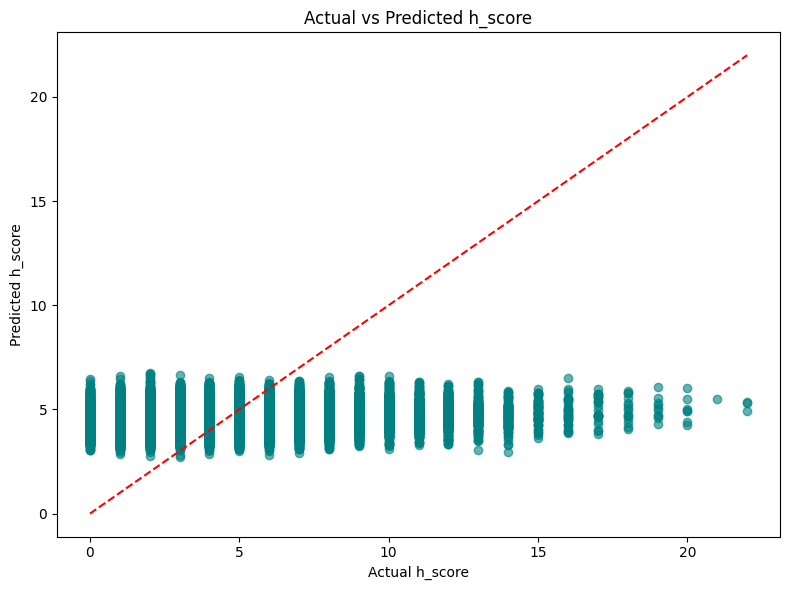

In [ ]:

# Get predicted values from your model
y_pred = model_ols.fittedvalues
y_true = dat_mpg['h_score']

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='teal')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')  # 45-degree reference line
plt.xlabel('Actual h_score')
plt.ylabel('Predicted h_score')
plt.title('Actual vs Predicted h_score')
plt.tight_layout()
plt.show()

So it doesn't look very satisfactory overall...
We calculated the correlation between actual and predicted h_score values to assess model performance.
The scatterplot shows how closely predictions align with outcomes, and the correlation coefficient quantifies the strength of that relationship. A higher value indicates better predictive accuracy.

In [ ]:
import statsmodels.api as sm

# Fit Poisson regression with log-link
model_poisson = sm.GLM(y, X.astype(float), family=sm.families.Poisson(link=sm.families.links.log())).fit()

# View summary
print(model_poisson.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                h_score   No. Observations:                26725
Model:                            GLM   Df Residuals:                    26653
Model Family:                 Poisson   Df Model:                           71
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68715.
Date:                Wed, 15 Oct 2025   Deviance:                       55237.
Time:                        17:28:39   Pearson chi2:                 5.31e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06333
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              31.9192      1.832     

The OLS model has an R² of 0.032, meaning it explains just 3.2% of the variation in h_score. In contrast, the Poisson regression shows a pseudo R² of 0.063 — nearly double — indicating a better fit for the count-like nature of the data. While both models have limited predictive power, Poisson regression offers a more appropriate structure for modeling positive, discrete outcomes.


## Prepare Input for the model

## Predict with the model

In [ ]:
# Step 1: Create a copy of the original training columns
X_game = pd.DataFrame(columns=X.columns)

# Step 2: Fill in the values for this specific game
X_game.loc[0] = 0  # initialize all to zero
X_game.loc[0, 'h_wins'] = 38
X_game.loc[0, 'v_game_number'] = 81
X_game.loc[0, 'v_wins'] = 41

In [ ]:
predicted_runs = model_poisson.predict(X_game)[0]
print(f"Predicted home team runs: {predicted_runs:.2f}")

Predicted home team runs: 1.07


In [ ]:
actual_runs = 5
predicted_runs = model_poisson.predict(X_game)[0]



In [ ]:
error = actual_runs - predicted_runs
abs_error = abs(error)

print(f"Actual runs: {actual_runs}")
print(f"Predicted runs: {predicted_runs:.2f}")
print(f"Absolute error: {abs_error:.2f}")


Actual runs: 5
Predicted runs: 1.07
Absolute error: 3.93


##Model Performance Summary
For the July 1, 2017 game between the Cincinnati Reds and Chicago Cubs, the home team scored 5 runs. Our Poisson regression model predicted 1.07 runs, resulting in an absolute error of 3.93. This indicates a significant underestimation, suggesting that the model may struggle to capture higher-scoring outcomes or lacks key predictive features for this game context. Further evaluation across multiple games is needed to assess overall model reliability.


